# **importing libraries**

In [87]:
import os
import numpy as np
import matplotlib.pyplot as plt


import keras
from keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


%matplotlib inline


In [88]:
batch_size = 256
num_classes = 10
epochs = 20
data_augmentation = True # technique for preventing the overfit in model

# Load CIFAR10 Dataset

In [89]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print("Training set sample:{} " .format(X_train.shape))
print("- Number of training samples: ", X_train.shape[0])
print("- Number of test samples: ", X_test.shape[0])

Training set sample:(50000, 32, 32, 3) 
- Number of training samples:  50000
- Number of test samples:  10000


# Data Visualization

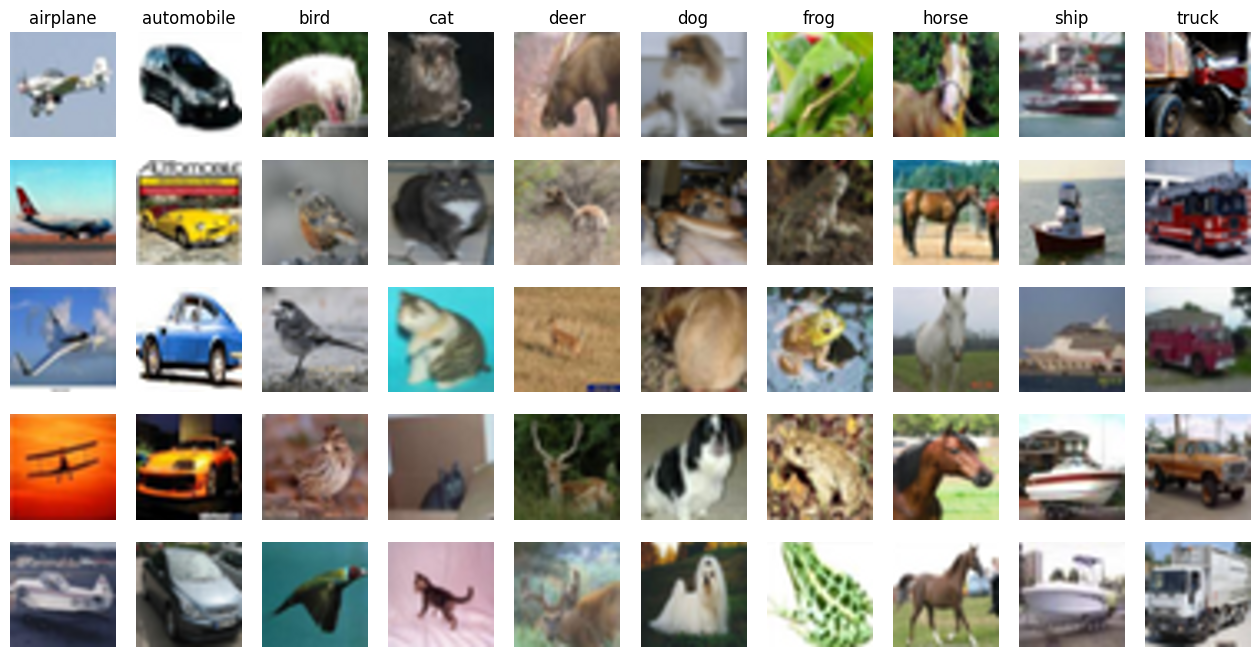

In [90]:
calss_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_for_class = 5

plt.figure(figsize=(16, 8))

for cls, name in enumerate(calss_names):
  idxs = np.flatnonzero(y_train == cls)
  idxs = np.random.choice(idxs, samples_for_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(samples_for_class, num_classes, i * num_classes + cls + 1)
    plt.imshow(X_train[idx].astype('uint8'), interpolation='spline16')
    plt.axis('off')
    if i == 0 :
      plt.title(calss_names[cls])

plt.show()

# Data preprocessing

In [91]:
#convert pixel range from [0, 255] to [0., 1.]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

mu  = np.mean(X_train, axis=0)
X_train -= mu
X_test -= mu

X_train /= 255.0
X_test /= 255.0

#One-hot encoding

In [92]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##Convolutinal Neural Network

In [93]:
model = Sequential()

model.add(Conv2D(64, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(128, (3,3),padding='same',  activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))


model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 30, 30, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,289,674 (4.92 MB)

 Trainable params: 1,289,674 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

#Optimizer

In [94]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'] )

#Train Model

#Load pre-trained weight

In [95]:
#Start training
weight_filename = 'CNN-weights.h5'

if os.path.exists(weight_filename):
  model.load_weights(weight_filename)

#Start Training



In [96]:
if not data_augmentation:
    print('Training without data augmentation.')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              shuffle=True)
else:
    print('Training using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=False)

    datagen.fit(X_train)
    model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=epochs,
                        validation_data=(X_test, y_test))


Training using real-time data augmentation.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step - accuracy: 0.2267 - loss: 2.0347 - val_accuracy: 0.4567 - val_loss: 1.4766
Epoch 2/20
  1/195 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4648 - loss: 1.5244

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4648 - loss: 1.5244 - val_accuracy: 0.4608 - val_loss: 1.4665
Epoch 3/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 34s 169ms/step - accuracy: 0.4541 - loss: 1.4810 - val_accuracy: 0.5311 - val_loss: 1.2773
Epoch 4/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5117 - loss: 1.3418 - val_accuracy: 0.5587 - val_loss: 1.2210
Epoch 5/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 166ms/step - accuracy: 0.5592 - loss: 1.2180 - val_accuracy: 0.5893 - val_loss: 1.1751
Epoch 6/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6602 - loss: 1.0573 - val_accuracy: 0.6026 - val_loss: 1.1289
Epoch 7/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 34s 168ms/step - accuracy: 0.6270 - loss: 1.0364 - val_accuracy: 0.6632 - val_loss: 0.9514
Epoch 8/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6914 - loss: 0.8568 - val_accuracy: 0.6511 - val_loss: 0.9983
Epoch 9/20
195/195 ━━━━━━━━━━━━━━━━━━━━ 39s 167ms/step - accuracy: 0.6805 - loss: 0.9006 - val_accuracy: 0

In [97]:
model.save_weights('CNN-.weights.h5')

In [98]:
#select 25 random images from tetsimages
idx = np.random.choice(X_test.shape[0],25, replace=False)

#predict class for select image s
y_pred = model.predict(X_test[idx])


y_pred_classes = y_pred.argmax(axis=1)

#true class for selected images
y_true = y_test[idx].argmax(axis=1)

print( np.mean(y_pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
0.1


In [99]:
X_test *= 255
X_test += mu
X_test = X_test.astype(np.uint8)

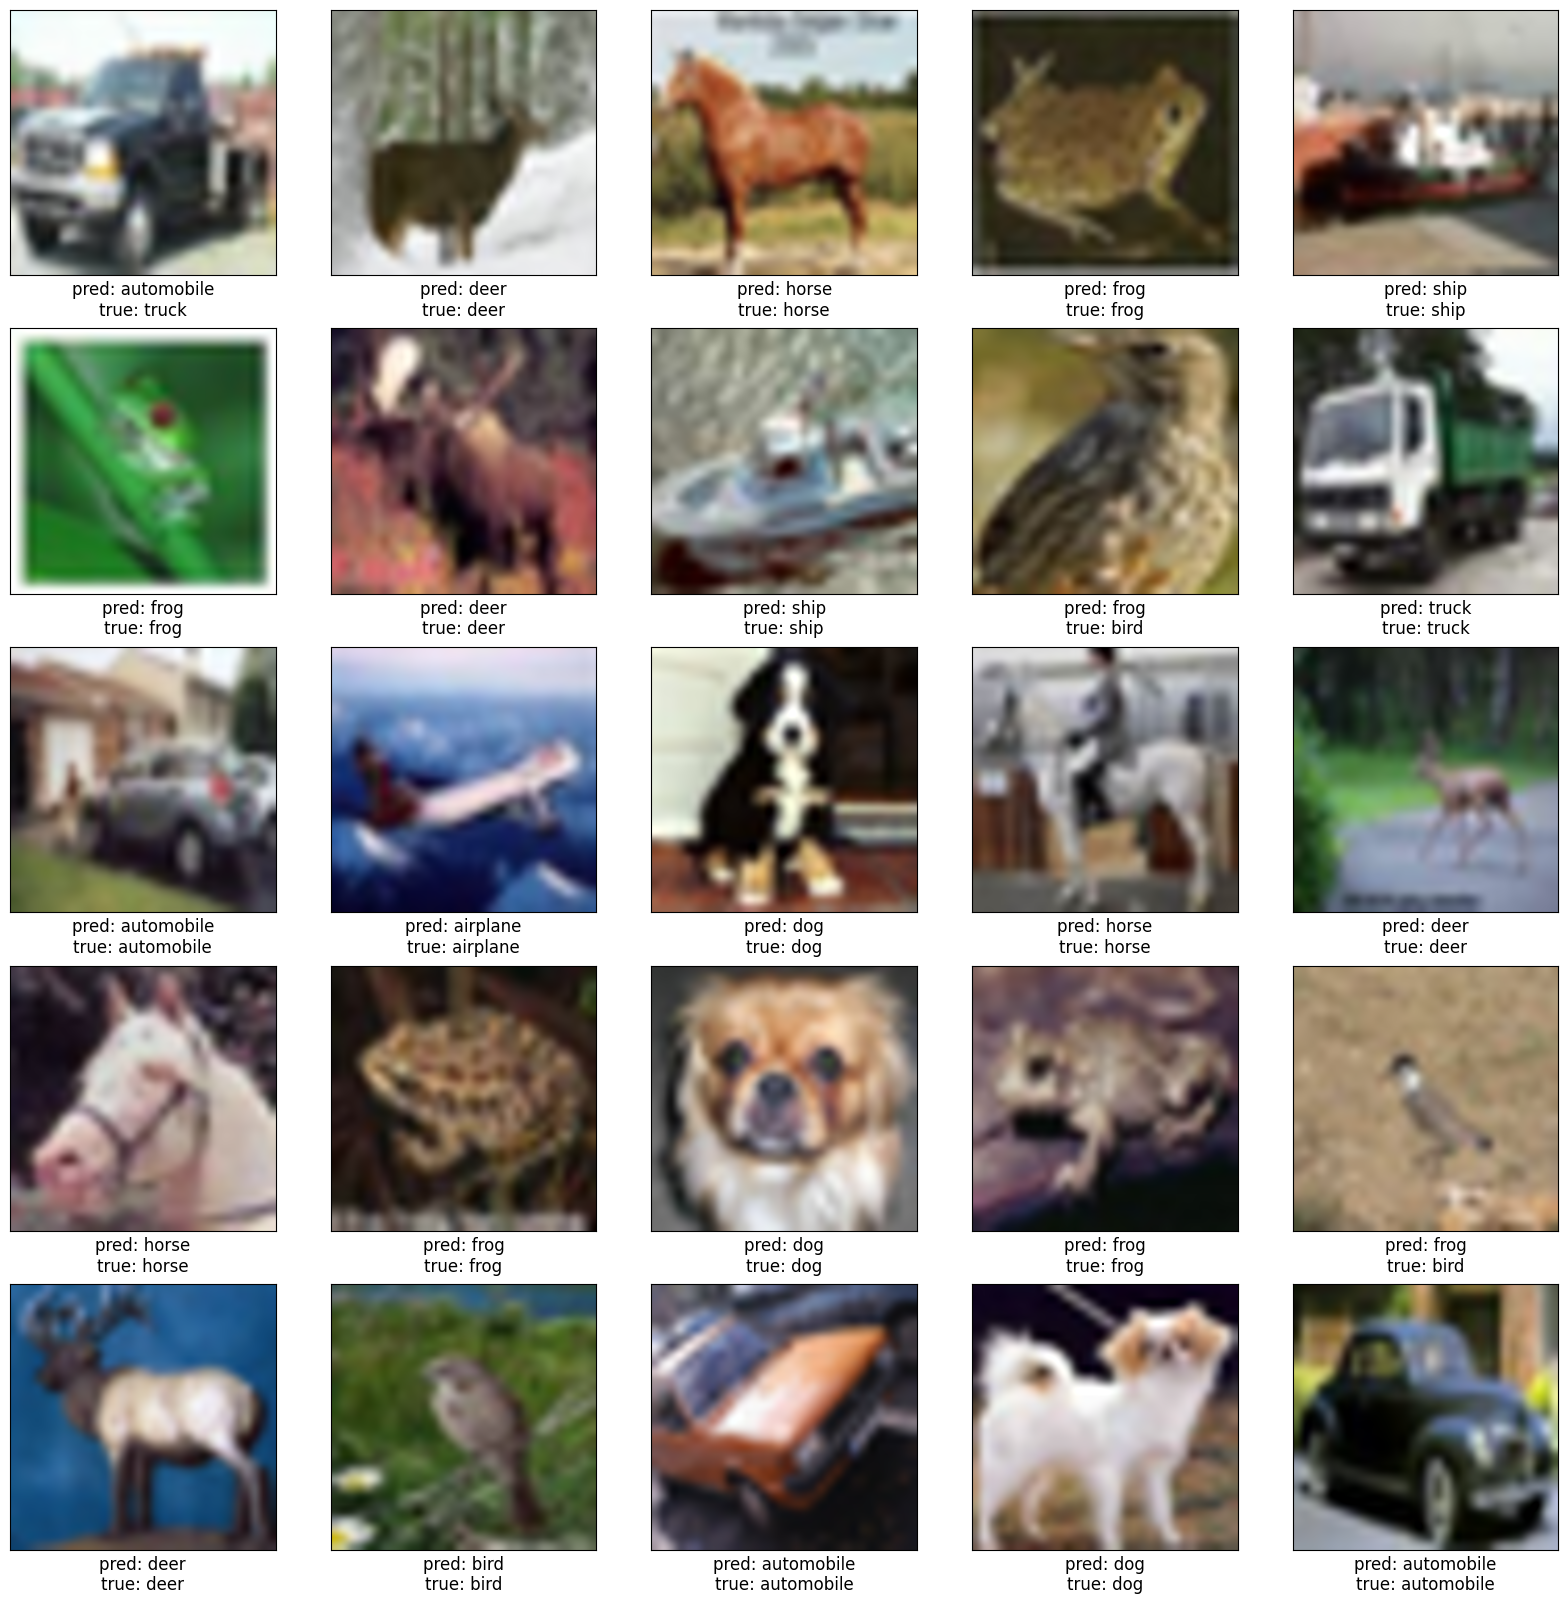

In [100]:
fig, axes = plt.subplots(5, 5, figsize=(20, 20))

for i , ax in enumerate(axes.flat):
  ax.imshow(X_test[idx[i]], interpolation='spline16')
  pred_class = calss_names[y_pred_classes[i]]
  true_class = calss_names[y_true[i]]
  ax.set_xlabel('pred: {}\ntrue: {}'.format(pred_class, true_class), fontsize=12)
  ax.set_xticks([])
  ax.set_yticks([])